<a href="https://colab.research.google.com/github/Patricia1501/CodersCave-Internship-Data-Science/blob/main/Task_2_Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CodersCave**

### <center><b><u>Task - 2 : Email Spam Detection Using Python</center>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CodersCave Internship/Task 2-Email Spam Detection/spam_ham_dataset.csv')

In [ ]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
df.head()        # Displays first 5 rows by default

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.tail()      # Displays last 5 rows by default

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [ ]:
df.shape      # Print the shape
# rows=5171  ,  col=4

(5171, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


DATA PREPROCESSING

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [ ]:
df['Unnamed: 0'].unique()

array([ 605, 2349, 3624, ..., 2933, 1409, 4807])

In [ ]:
df['label_num'].unique()

array([0, 1])

<Axes: >

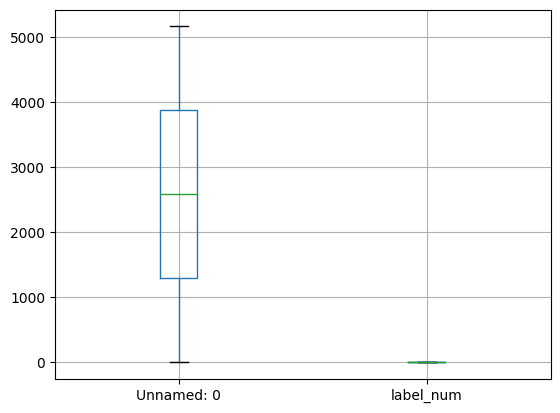

In [ ]:
df.boxplot()


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'label_num'}>]], dtype=object)

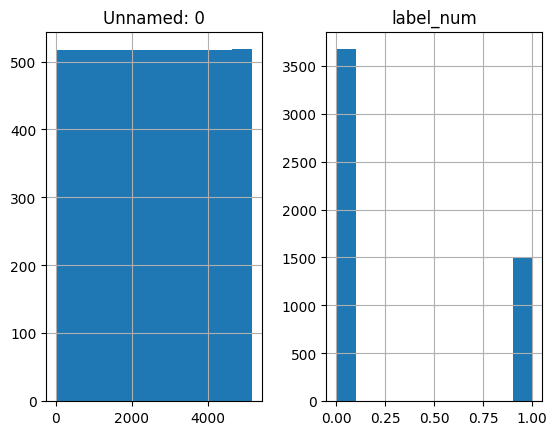

In [ ]:
df.hist()

### Drop the unwanted columns.

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)      #Dropping the column 'Unnamed: 0'

In [ ]:
df.drop('label_num',axis=1,inplace=True)        # Dropping the column 'label_num'

In [ ]:
df

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [ ]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [ ]:
df.columns

Index(['label', 'text', 'label_num'], dtype='object')

In [ ]:
# Renaming the column names
df.columns = ['Type','Subject']


In [ ]:
df

,Type,Subject
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [ ]:
df['Type'].unique()

array(['ham', 'spam'], dtype=object)

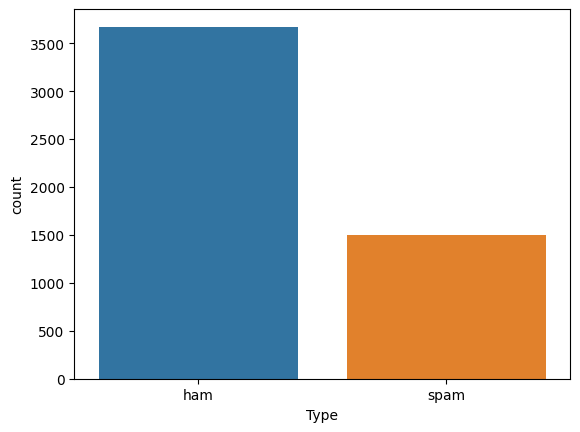

In [ ]:
sns.countplot(data = df, x='Type')
plt.show()

In [ ]:
# Check for duplicates
df.duplicated().sum()

178

In [ ]:
# Drop the duplicates
df.drop_duplicates()

,Type,Subject
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5165,ham,"Subject: fw : crosstex energy , driscoll ranch..."
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169,ham,Subject: industrial worksheets for august 2000...


### Data Cleaning

<b>HAM</b><br>
The term ‘ham’ was originally coined by SpamBayes sometime around 2001 and is currently defined and understood to be “E-mail that is generally desired and isn't considered spam.”<br>

<b>SPAM</b><br>
“The use of electronic messaging systems to send unsolicited bulk messages, especially advertising, indiscriminately.” In 2003 the CAN-SPAM ACT was made law.


For 'Type' Column

In [ ]:
# Differentiate ham and spam with 1 & 0 
# ham = 1 , spam = 0
df.loc[df['Type'] == 'spam', 'Type',] = 0
df.loc[df['Type'] == 'ham', 'Type',] = 1
df

,Type,Subject
0,1,Subject: enron methanol ; meter # : 988291\r\n...
1,1,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,1,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,0,"Subject: photoshop , windows , office . cheap ..."
4,1,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,1,Subject: put the 10 on the ft\r\nthe transport...
5167,1,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,1,Subject: calpine daily gas nomination\r\n>\r\n...
5169,1,Subject: industrial worksheets for august 2000...


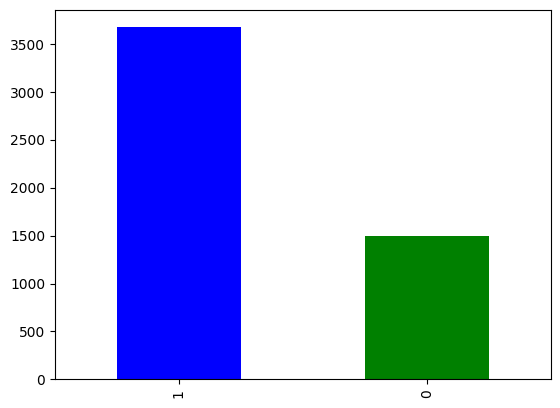

In [ ]:
df['Type'].value_counts().plot(kind='bar',color=('b','g'))
plt.show()

For 'Subject' Column

In [ ]:
df["Subject"]

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: Subject, Length: 5171, dtype: object

Every Row of this Column has lower case and special characters in a data. So first we will convert the text into lower case and then we will clean the data by removing all these special characters.

For Removing this we use the RegexpTokenizer function from the Natural Language Toolkit (NLTK) library to tokenize the string using the regular expression pattern.

In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    string = string.lower()                    # converting string into lowercase
    tokens = reg.tokenize(string)              # tokenize the string on defined pattern
    return " ".join(tokens)                    # join the tokens with single space character and return the output

In [ ]:
# Applying lambda function for changing the data of 'Subject' Column
df['Subject'] = df['Subject'].apply(lambda string: clean_str(string))
df

,Type,Subject
0,1,subject enron methanol meter this is a follow ...
1,1,subject hpl nom for january see attached file ...
2,1,subject neon retreat ho ho ho we re around to ...
3,0,subject photoshop windows office cheap main tr...
4,1,subject re indian springs this deal is to book...
...,...,...
5166,1,subject put the on the ft the transport volume...
5167,1,subject and following noms hpl can t take the ...
5168,1,subject calpine daily gas nomination julie as ...
5169,1,subject industrial worksheets for august activ...


In [ ]:
X = df['Type']
Y = df['Subject']

In [ ]:
print(X)

0       1
1       1
2       1
3       0
4       1
       ..
5166    1
5167    1
5168    1
5169    1
5170    0
Name: Type, Length: 5171, dtype: object


In [ ]:
print(Y)

0       subject enron methanol meter this is a follow ...
1       subject hpl nom for january see attached file ...
2       subject neon retreat ho ho ho we re around to ...
3       subject photoshop windows office cheap main tr...
4       subject re indian springs this deal is to book...
                              ...                        
5166    subject put the on the ft the transport volume...
5167    subject and following noms hpl can t take the ...
5168    subject calpine daily gas nomination julie as ...
5169    subject industrial worksheets for august activ...
5170    subject important online banking alert dear va...
Name: Subject, Length: 5171, dtype: object


#### Split the data as training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
X_train = X_train.astype('int')
X_test = X_test.astype('int')

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5171,)
(4136,)
(1035,)


### Feature Extraction

In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

#min_df is tell the model that what is the minimum frequency for a word to consider.
#stop_words is a inbuilt function which is used to tell the model to remove the basic words like the, as, a, in etc.
#lowercase is used to lowercase all letters in the mail

In [ ]:
Y_train_featured = feature_extraction.fit_transform(Y_train)
Y_test_featured = feature_extraction.transform(Y_test)
print(Y_train)

3628    subject meter scherlyn per our conversation he...
2491    subject natural gas nomination for enron metha...
3262    subject cleburne outage gentlemen i wanted to ...
2972    subject daren the firm trading waha book has b...
2481    subject re mon feb page loading image not show...
                              ...                        
4931    subject re pretty boy wants to meet his soulma...
3264    subject if you need to make money learn from t...
1653    subject find out where to buy drugs cheap find...
2607    subject job survey and matching heather darren...
2732    subject forwarded by tom acton corp enron on p...
Name: Subject, Length: 4136, dtype: object


In [ ]:
# Text is converted into numerical form
print(Y_train_featured)

  (0, 34843)	0.209674553125394
  (0, 17597)	0.21749164358073084
  (0, 35016)	0.25752744732861527
  (0, 24052)	0.14133037133722523
  (0, 12362)	0.23041955710463574
  (0, 21064)	0.18690079795641928
  (0, 20012)	0.12219812145536768
  (0, 20732)	0.1316413681304691
  (0, 31462)	0.25306377591220497
  (0, 34391)	0.17408496520088396
  (0, 8128)	0.16346769341772793
  (0, 23933)	0.18952860841730024
  (0, 21914)	0.18797819133930524
  (0, 13535)	0.21436091487202985
  (0, 23262)	0.21360930091171546
  (0, 8188)	0.2691224181448108
  (0, 30756)	0.41209823477907254
  (0, 22615)	0.4167946496245476
  (0, 33287)	0.04772650009362891
  (1, 26953)	0.12968696823568582
  (1, 23312)	0.16840793303087576
  (1, 23480)	0.1892561946689478
  (1, 11794)	0.19616932840527507
  (1, 9379)	0.19252222664107874
  (1, 23050)	0.2038437513299149
  :	:
  (4135, 15758)	0.12162838130188036
  (4135, 389)	0.26723642070815484
  (4135, 28828)	0.10925795588389492
  (4135, 23260)	0.08506967613644434
  (4135, 32084)	0.1104144485252494
  

### Perform Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(Y_train_featured,X_train)

LogisticRegression()

Check the Accuracy of the model

In [ ]:
Prediction_on_train_data = model.predict(Y_train_featured)

In [ ]:
accuracy_on_train_data = accuracy_score(X_train,Prediction_on_train_data)
print(accuracy_on_train_data)

0.9963733075435203


In [ ]:
Prediction_on_test_data = model.predict(Y_test_featured)
accuracy_on_test_data = accuracy_score(X_test,Prediction_on_test_data)
print(accuracy_on_test_data)

0.9874396135265701


Predicting the mail (User Input)

In [ ]:
mail=[input("Enter your mail:")]
predict=feature_extraction.transform(mail)
final_prediction=model.predict(predict)
print(final_prediction)
if final_prediction[0]==0:
  print("Ham Mail")
else:
  print("Spam Mail")

Enter your mail:Congrats! You won a lottery
[0]
Ham Mail
